# Analysing Cristiano Ronaldo's career history using pandas library

# Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Cristiano Ronaldo data csv file 

In [3]:
df=pd.read_csv('ranaldu.csv')

In [4]:
df

,Season,Competition,Club,Squad,PPG,Goals,Assists,Own goals,Penalty goals,Minutes per goal,Substitution on,Substitution off,Yellow Cards,Second yellow cards,Red Cards,Minutes played
0,22/23,Premier League,Manchester United,10,2,1,-,NaN,-,340,6,1,1,-,NaN,340
1,22/23,Europe League,Manchester United,4,2.25,1,1,NaN,1,351,-,1,-,-,NaN,351
2,21/22,Premier League,Manchester United,30,1.63,18,3,NaN,3,137,3,6,8,-,NaN,2459
3,21/22,Chempions League,Manchester United,7,1.57,6,-,NaN,-,102,-,2,1,-,NaN,612
4,21/22,FA Cup,Manchester United,1,0,NaN,-,NaN,-,-,-,-,-,-,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,02/03,SuperLiga,Sporting,30,1.56,3,5,NaN,NaN,356,14,8,1,-,NaN,172
79,02/03,Tace de Portugal,Sporting,3,2,2,-,NaN,NaN,86,1,1,-,-,NaN,118
80,02/03,UEFA Cup,Sporting,2,0.5,-,1,NaN,NaN,-,1,1,-,-,NaN,-
81,02/03,Supertaca,Sporting,1,-,-,-,NaN,NaN,-,-,-,-,-,NaN,32


# 1. Data Exploration

In [7]:
#By default we can see first 5 rows
df.head()

,Season,Competition,Club,Squad,PPG,Goals,Assists,Own goals,Penalty goals,Minutes per goal,Substitution on,Substitution off,Yellow Cards,Second yellow cards,Red Cards,Minutes played
0,22/23,Premier League,Manchester United,10,2,1,-,NaN,-,340,6,1,1,-,NaN,340
1,22/23,Europe League,Manchester United,4,2.25,1,1,NaN,1,351,-,1,-,-,NaN,351
2,21/22,Premier League,Manchester United,30,1.63,18,3,NaN,3,137,3,6,8,-,NaN,2459
3,21/22,Chempions League,Manchester United,7,1.57,6,-,NaN,-,102,-,2,1,-,NaN,612
4,21/22,FA Cup,Manchester United,1,0,NaN,-,NaN,-,-,-,-,-,-,NaN,120


In [8]:
# Shape of our dataframe includes 83 rows and 16 columns
df.shape

(83, 16)

In [9]:
#Index of df startes 0 and ends with 83
df.index

RangeIndex(start=0, stop=83, step=1)

In [11]:
# all columns of df
df.columns

Index(['Season', 'Competition', 'Club', 'Squad', 'PPG', 'Goals', 'Assists',
       'Own goals', 'Penalty goals', 'Minutes per goal', 'Substitution on',
       'Substitution off', 'Yellow Cards', 'Second yellow cards', 'Red Cards',
       'Minutes played'],
      dtype='object')

In [14]:
# all information about all data of df
df.dtypes

Season                  object
Competition             object
Club                    object
Squad                    int64
PPG                     object
Goals                   object
Assists                 object
Own goals              float64
Penalty goals           object
Minutes per goal        object
Substitution on         object
Substitution off        object
Yellow Cards            object
Second yellow cards     object
Red Cards              float64
Minutes played          object
dtype: object

In [16]:
#  The unique elements of particular column
df['Goals'].unique()

array(['1', '18', '6', nan, '29', '2', '4', '31', '-', '21', '15', '26',
       '12', '25', '16', '35', '48', '10', '17', '3', '7', '34', '46',
       '40', '8', '9', '5'], dtype=object)

In [17]:
#Number of particular column unique elements
df['Goals'].nunique()

26

In [18]:
# Total number of non null elements
df.count()

Season                 83
Competition            83
Club                   83
Squad                  83
PPG                    83
Goals                  81
Assists                83
Own goals               1
Penalty goals          64
Minutes per goal       83
Substitution on        83
Substitution off       83
Yellow Cards           83
Second yellow cards    83
Red Cards               2
Minutes played         82
dtype: int64

In [19]:
# General charectiristics of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               83 non-null     object 
 1   Competition          83 non-null     object 
 2   Club                 83 non-null     object 
 3   Squad                83 non-null     int64  
 4   PPG                  83 non-null     object 
 5   Goals                81 non-null     object 
 6   Assists              83 non-null     object 
 7   Own goals            1 non-null      float64
 8   Penalty goals        64 non-null     object 
 9   Minutes per goal     83 non-null     object 
 10  Substitution on      83 non-null     object 
 11  Substitution off     83 non-null     object 
 12  Yellow Cards         83 non-null     object 
 13  Second yellow cards  83 non-null     object 
 14  Red Cards            2 non-null      float64
 15  Minutes played       82 non-null     objec

In [20]:
#All stattistical information of df 
df.describe()

,Squad,Own goals,Red Cards
count,83.000000,1.0,2.0
mean,11.638554,1.0,1.0
std,12.430861,NaN,0.0
min,1.000000,1.0,1.0
25%,2.000000,1.0,1.0
50%,6.000000,1.0,1.0
75%,13.000000,1.0,1.0
max,38.000000,1.0,1.0


# Analysis and question part

In [24]:
#First we will check either has null values or not
#We can see that some of columns has a null or missing values including:Goals,Own Goals,Penalty Goals,Red Cards and Minut Played
#In our table all missing vaues means 0. For example o goals is no goal
df.isnull().sum()

Season                  0
Competition             0
Club                    0
Squad                   0
PPG                     0
Goals                   2
Assists                 0
Own goals              82
Penalty goals          19
Minutes per goal        0
Substitution on         0
Substitution off        0
Yellow Cards            0
Second yellow cards     0
Red Cards              81
Minutes played          1
dtype: int64

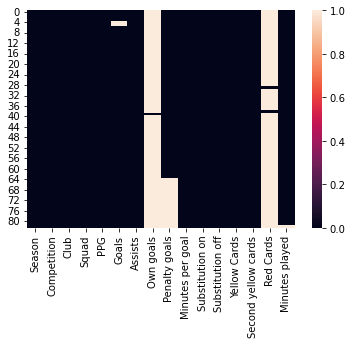

In [30]:
#Plotting missing values with seaborn library
sns.heatmap(df.isnull())

plt.show()

In [31]:
df.head(2)

,Season,Competition,Club,Squad,PPG,Goals,Assists,Own goals,Penalty goals,Minutes per goal,Substitution on,Substitution off,Yellow Cards,Second yellow cards,Red Cards,Minutes played
0,22/23,Premier League,Manchester United,10,2,1,-,NaN,-,340,6,1,1,-,NaN,340
1,22/23,Europe League,Manchester United,4,2.25,1,1,NaN,1,351,-,1,-,-,NaN,351


# 1. What is mean of Goals,Assits,Penalty Goals

In [45]:
#Goals
print(df['Goals'].value_counts().mean())
#Assits
print(df['Assists'].value_counts().mean())
#Penalty goals
print(df['Penalty goals'].value_counts().mean())

3.1153846153846154
5.928571428571429
6.4


# 2. what is max and min  of Goals,Assits,Penalty Goals

In [50]:
#Goals
print(df['Goals'].value_counts().max())
print(df['Goals'].value_counts().min())
#Assits
print(df['Assists'].value_counts().max())
print(df['Assists'].value_counts().min())
#Penalty goals
print(df['Penalty goals'].value_counts().max())
print(df['Penalty goals'].value_counts().min())

17
1
33
1
28
1


# 3. The number of goals by season

In [56]:
df.groupby('Goals')['Season'].value_counts()

Goals  Season
-      02/03     3
       04/05     3
       03/04     2
       05/06     2
       14/15     2
                ..
7      09/10     1
       10/11     1
       12/13     1
8      07/08     1
9      05/06     1
Name: Season, Length: 71, dtype: int64

# 4. Number of assistant according to played club

In [58]:
df.groupby('Club')['Assists'].value_counts()

Club               Assists
Juventus           -           7
                   2           3
                   1           1
                   6           1
                   9           1
Manchester United  -          12
                   1           8
                   3           4
                   4           2
                   7           2
                   2           1
                   5           1
                   6           1
                   8           1
Real Madrid        -          11
                   1           5
                   11          3
                   4           3
                   3           2
                   5           2
                   6           2
                   12          1
                   13          1
                   17          1
                   2           1
                   9           1
Sporting           -           3
                   1           1
                   5           1
Name: Assists, d

# 5. List of clubs where Squadm, own goals, red cards

In [66]:
df.groupby('Club').sum()


,Squad,Own goals,Red Cards
Club,,,
Juventus,136,0.0,0.0
Manchester United,352,0.0,0.0
Real Madrid,441,1.0,2.0
Sporting,37,0.0,0.0


# 6. Minutes per goal accordingly competation and clubs(season)

In [68]:
df.head(2)

,Season,Competition,Club,Squad,PPG,Goals,Assists,Own goals,Penalty goals,Minutes per goal,Substitution on,Substitution off,Yellow Cards,Second yellow cards,Red Cards,Minutes played
0,22/23,Premier League,Manchester United,10,2,1,-,NaN,-,340,6,1,1,-,NaN,340
1,22/23,Europe League,Manchester United,4,2.25,1,1,NaN,1,351,-,1,-,-,NaN,351


In [95]:
#1
print(df.groupby('Minutes per goal')['Competition'].value_counts())
#2
print(df.groupby('Minutes per goal')['Club'].value_counts())


Minutes per goal  Competition        
-                 Chempions League       3
                  League Cup             3
                  Chempions League Qu    2
                  FA Cup                 2
                  Club World Cup         1
                                        ..
94                Cope del Rey           1
                  Seria A                1
95                LaLiga                 1
97                Seria A                1
98                Cope del Rey           1
Name: Competition, Length: 75, dtype: int64
Minutes per goal  Club             
-                 Manchester United    10
                  Juventus              3
                  Real Madrid           3
                  Sporting              3
100               Real Madrid           1
                                       ..
94                Juventus              1
                  Real Madrid           1
95                Real Madrid           1
97                Juventus     

In [ ]:
#By Davronbek Malikov